# Análisis exploratorio de datos

Haremos un ejercicio sencillo de análisis exploratorio tomando datos de la competición de Kaggle sobre [coches usados](https://www.kaggle.com/datasets/sukhmanibedi/cars4u?select=used_cars_data.csv). Primeramente podemos importar las librerías que prevemos usar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Leemos el fichero CSV (comma separated values) que presenta una estructura tabular fácil de leer en Pandas. Disponemos de funciones específicas que nos permiten leer directamente del fichero.

In [2]:
data = pd.read_csv("../assets/data/used_cars_data.csv") # Ruta lógica desde donde se encuentra el notebook
data.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


La función `.info()` nos da una vista de pájaro de cara a identificar tipos de datos que no deberían ser, valores faltantes e información general sobre el conjunto de datos (filas, columnas, nombres,...)

In [4]:
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

Evaluando cuantos valores únicos existen por columna podemos entender que:

* S.No. es la clave, identificando únicamente cada fila con lo que no será útil a nivel estadístico.
* Que disponemos de categorías concretas para los campos como transmisión, tipo de dueño, tipo de combustible, etc.
* Que existen campos de los que necesitamos información adicional: ¿Precio y nuevo precio? Quizás se refiera el precio cuando era nuevo y el precio tras el uso.

In [5]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

Combinando varias funciones vemos como podemos obtener si son valores nulos y sumar las existencias. Los valores True se transforman en 1 ante suma de modo que nos indican cuantos valores faltantes hay. New price parece estar muy vacía con respecto al total de filas que tenemos.

In [6]:
# Obtenemos el valor porcentual

100 * data.isnull().sum()/len(data)

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

Es habitual necesitar eliminar algunas columnas por poco informativas, con lo que podemos indicar qué columnas eliminar mediante el uso de drop.

In [7]:
data = data.drop(['S.No.'], axis = 1)

## Ingeniería de características

La ingeniería de características (feature engineering) es el proceso de seleccionar, transformar o crear nuevas variables (características) a partir de los datos originales para mejorar el rendimiento de los modelos de machine learning. Este proceso puede incluir:

- **Creación de nuevas variables**: Por ejemplo, calcular la antigüedad del coche a partir del año de fabricación.
- **Transformación de variables**: Convertir variables categóricas en variables numéricas, aplicar transformaciones logarítmicas para reducir la asimetría, o normalizar valores.
- **Limpieza y tratamiento de valores nulos**: Rellenar o eliminar valores faltantes para asegurar la calidad de los datos.
- **Agrupación o combinación de variables**: Unir varias columnas para crear una nueva característica más informativa.

El objetivo es facilitar que los algoritmos de aprendizaje automático puedan extraer patrones útiles y mejorar la capacidad predictiva del modelo.

Podemos traer la clase `date` del módulo `datetime` para indicar el año actual y así calcular los años que tiene cada coche como una característica adicional.

In [8]:
from datetime import date

anio_actual = date.today().year
data['Car_Age'] = anio_actual-data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,12


También crear variables adicionales separando marca y modelo de la descripción general. `.str` nos da acceso a la cadena de texto dentro de la columna seleccionada.

In [9]:
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


Podemos revisar los nombre de marca y modelo para validar que no hay erratas.

In [10]:
print(data.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


In [11]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']

data[data.Brand.str.contains('|'.join(searchfor))].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,11,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,13,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,8,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,7,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,8,Mini,CooperConvertible
311,Land Rover Range Rover HSE Dynamic,Delhi,2017,44000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,44.00,8,Land,RoverRange
365,Mini Clubman Cooper S,Pune,2017,8350,Petrol,Manual,First,13.8 kmpl,1998 CC,192 bhp,5.0,44.59 Lakh,35.00,8,Mini,ClubmanCooper
391,Mini Cooper Convertible 1.6,Bangalore,2015,20000,Petrol,Automatic,First,18.86 kmpl,1598 CC,122 bhp,4.0,NaN,32.00,10,Mini,CooperConvertible
399,Land Rover Range Rover 2.2L Dynamic,Hyderabad,2012,56000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,30.00,13,Land,RoverRange
404,Land Rover Range Rover 2.2L Prestige,Coimbatore,2017,34990,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,53.83,8,Land,RoverRange


Reemplazamos los valores allá donde se cumpla el nombre de la clave del diccionario con el valor del diccionario.

In [12]:
a_reemplazar = {"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}

data["Brand"].replace(a_reemplazar, inplace=True) # Si no marcamos inplace devolverá un nuevo dataframe dejando intacto el original

Queremos eliminar las unidades de las millas, motor y potencia para poder pasarlos a valores numéricos que será más apropiado.

In [13]:
data['Mileage'] = data.Mileage.str.split().str.get(0)
data['Engine'] = data.Engine.str.split().str.get(0)
data['Power'] = data.Power.str.split().str.get(0)

data['Mileage'] = pd.to_numeric(data['Mileage'], errors='coerce')   
data['Engine'] = pd.to_numeric(data['Engine'], errors='coerce') 
data['Power'] = pd.to_numeric(data['Power'], errors='coerce') 

Y vemos cómo son las estadísticas de estos campos.

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.17,18.16,21.10,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.00,1493.00,1968.00,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.00,94.00,138.10,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00
Car_Age,7253.0,11.634634,3.254421,6.00,9.00,11.00,14.00,29.00


Por defecto solo incluye campos numéricos, por lo que deberemos indicar que queremos los datos de todos. Para los valores categóricos o cadenas nos indicará el número de únicos, los más frecuentes y cuantas veces ocurren.

In [15]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


In [16]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

print("Categóricas:", cat_cols)
print("Numéricas: ", num_cols)

Categóricas: Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'New_Price', 'Brand', 'Model'],
      dtype='object')
Numéricas:  ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Car_Age']


Sacaremos un pequeño perfilado de cada una calculando en nivel de asimetría que muestran.

Year
Skew : -0.84


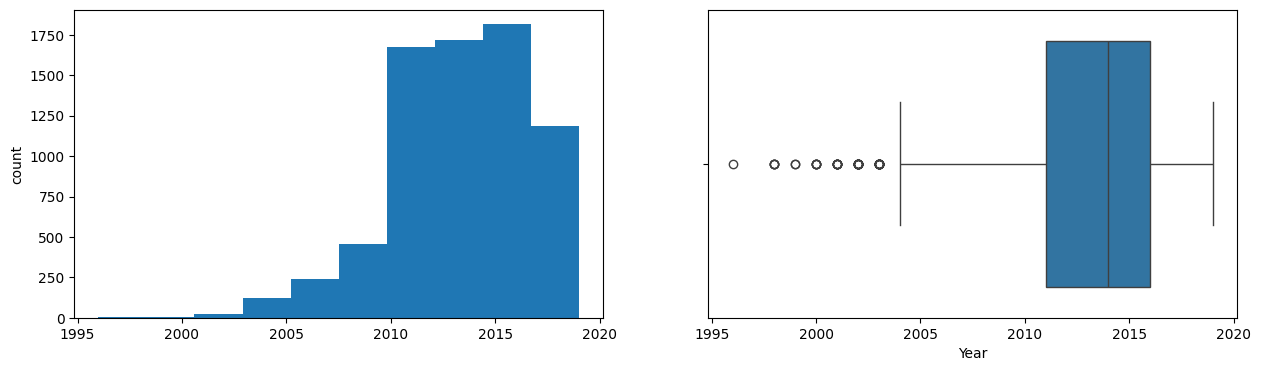

Kilometers_Driven
Skew : 61.58


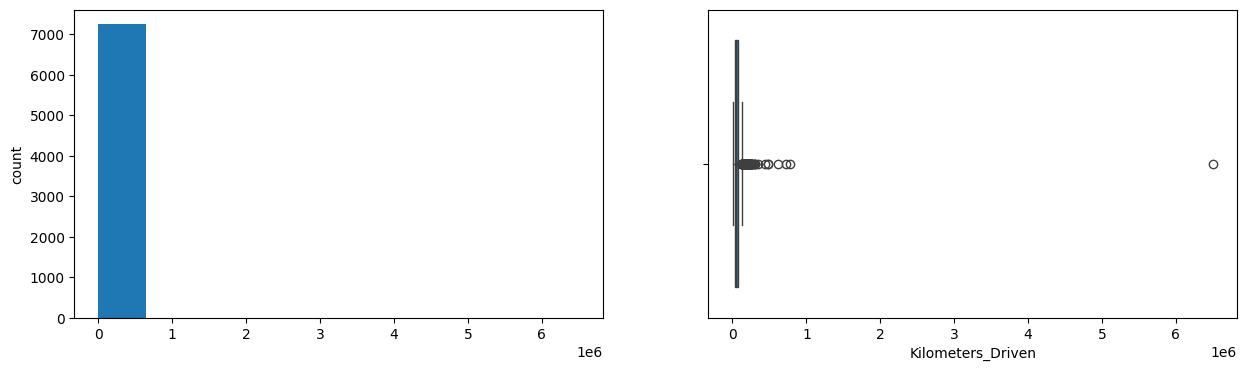

Mileage
Skew : -0.44


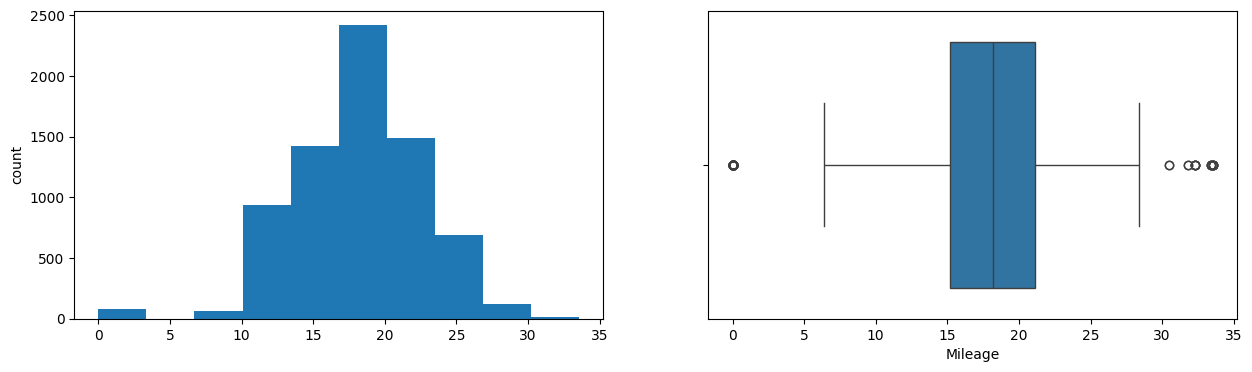

Engine
Skew : 1.41


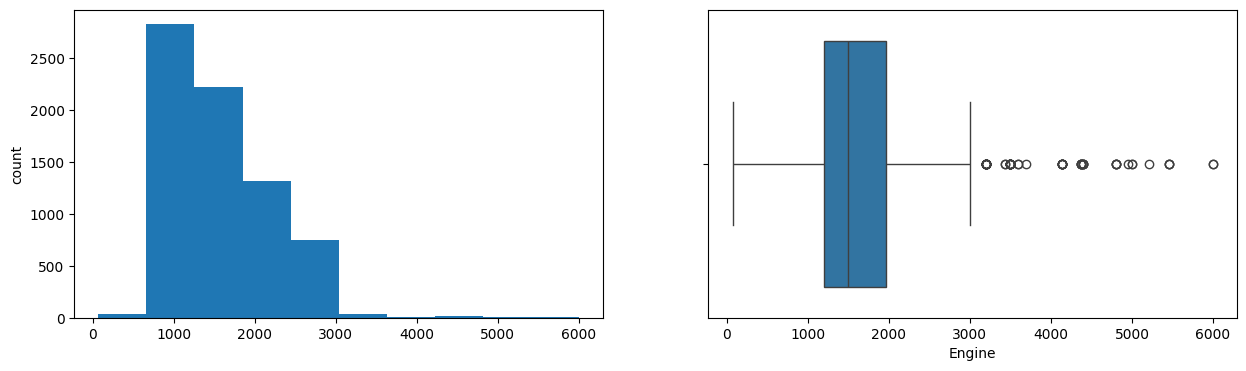

Power
Skew : 1.96


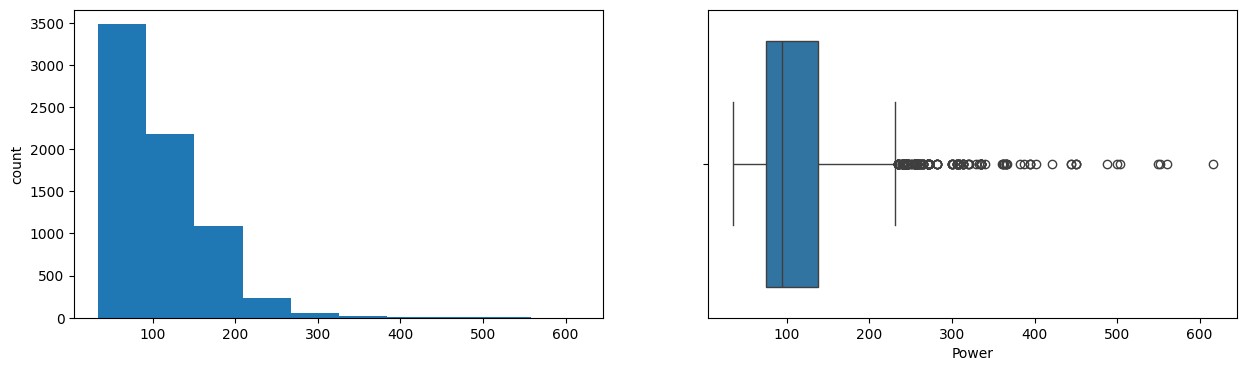

Seats
Skew : 1.9


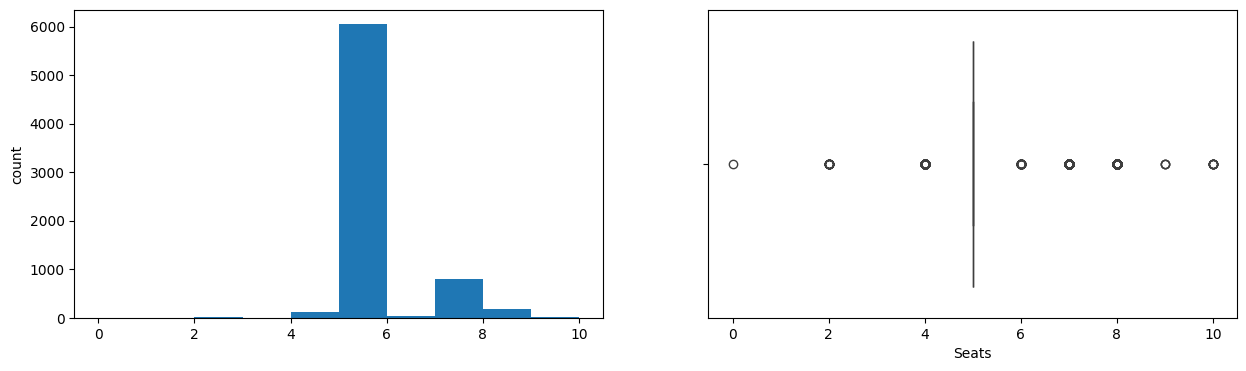

Price
Skew : 3.34


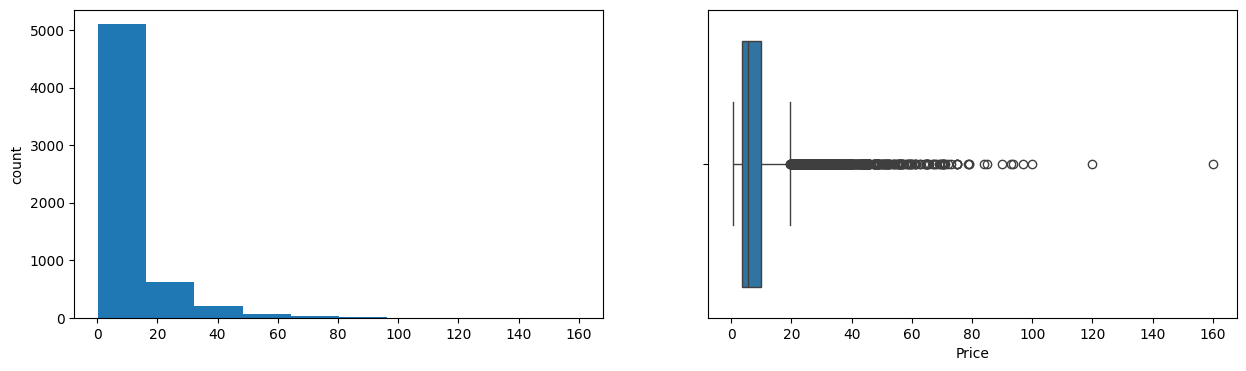

Car_Age
Skew : 0.84


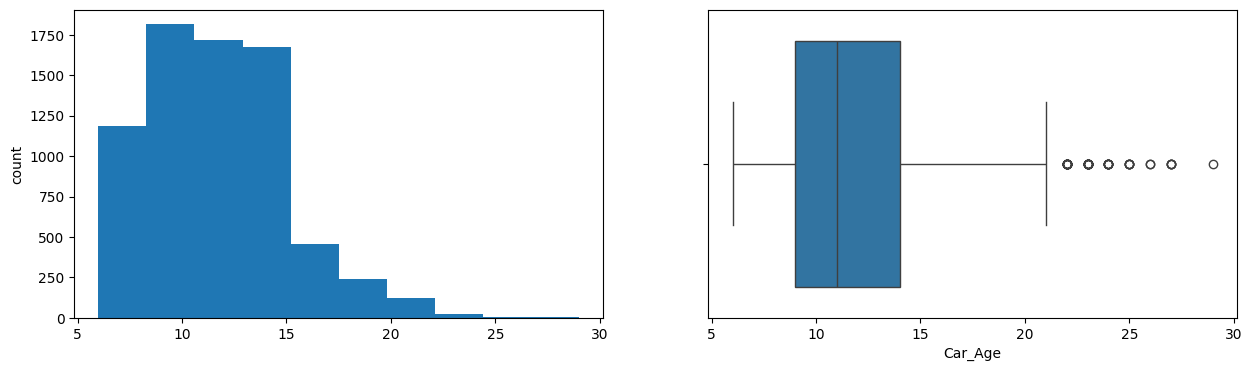

In [17]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

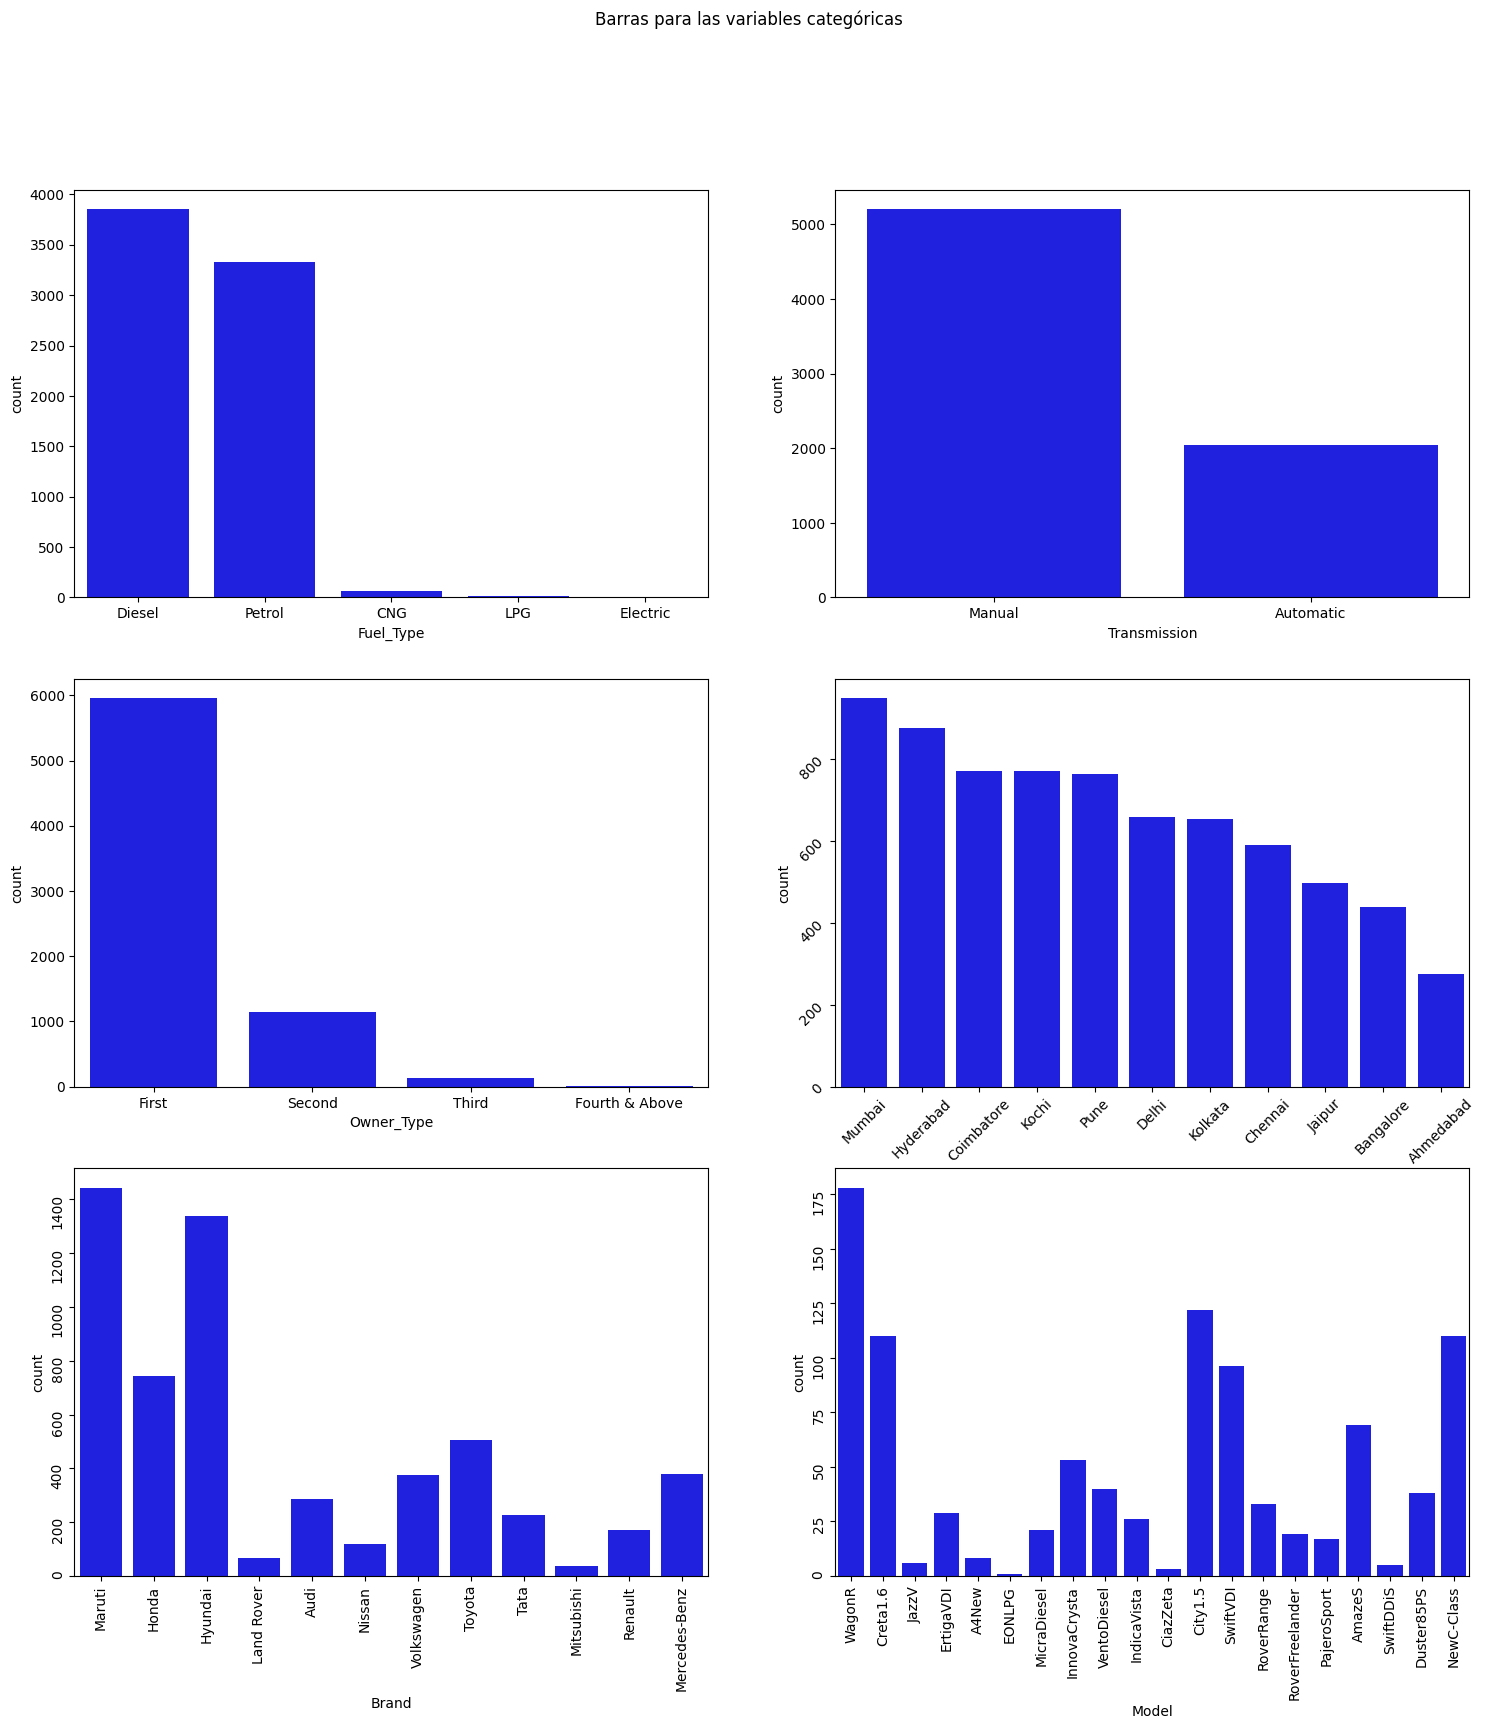

In [18]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Barras para las variables categóricas')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue', 
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue', 
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'blue', 
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue', 
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue', 
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue', 
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

La transformación logarítmica se utiliza para reducir la asimetría (skewness) de variables numéricas que presentan una distribución muy sesgada, como suele ocurrir con precios o kilometraje en coches usados. Al aplicar el logaritmo, los valores extremos se comprimen y la distribución se acerca más a una normal, facilitando el análisis estadístico y mejorando el rendimiento de los modelos de machine learning. Además, ayuda a visualizar mejor los datos y a mitigar el efecto de valores atípicos.

In [19]:
# Creamos una función
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [20]:
log_transform(data,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7251 non-null   float64
 8   Engine                 7207 non-null   float64
 9   Power                  7078 non-null   float64
 10  Seats                  7200 non-null   float64
 11  New_Price              1006 non-null   object 
 12  Price                  6019 non-null   float64
 13  Car_Age                7253 non-null   int64  
 14  Brand                  7253 non-null   object 
 15  Mode

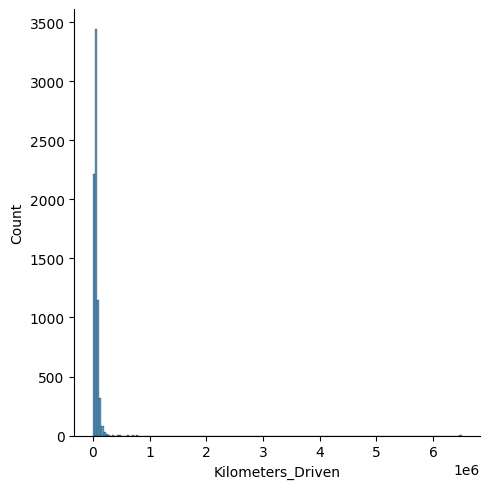

In [21]:
sns.displot(data["Kilometers_Driven"]);

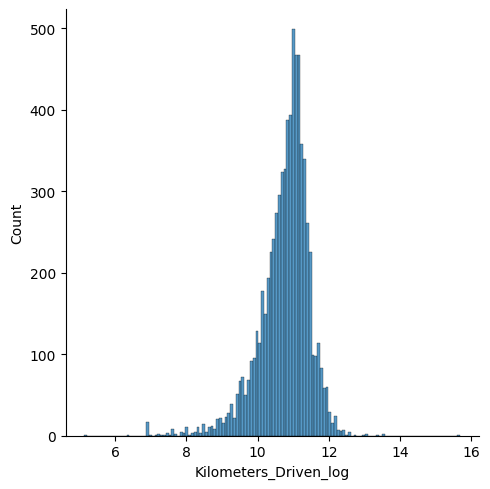

In [22]:
sns.displot(data["Kilometers_Driven_log"]);

Los diagramas a pares nos ayudan a entender cómo de relacionadas están las variables entre sí. Esto lo hacemos evaluando la **correlación** entre variables, que mide la fuerza y dirección de la relación lineal entre dos variables numéricas. Un valor cercano a 1 indica una relación positiva fuerte, mientras que un valor cercano a -1 indica una relación negativa fuerte. Valores próximos a 0 sugieren poca o ninguna relación lineal. Analizar la correlación nos ayuda a identificar qué variables pueden estar relacionadas y ser relevantes para modelos predictivos.

<Figure size 1300x1700 with 0 Axes>

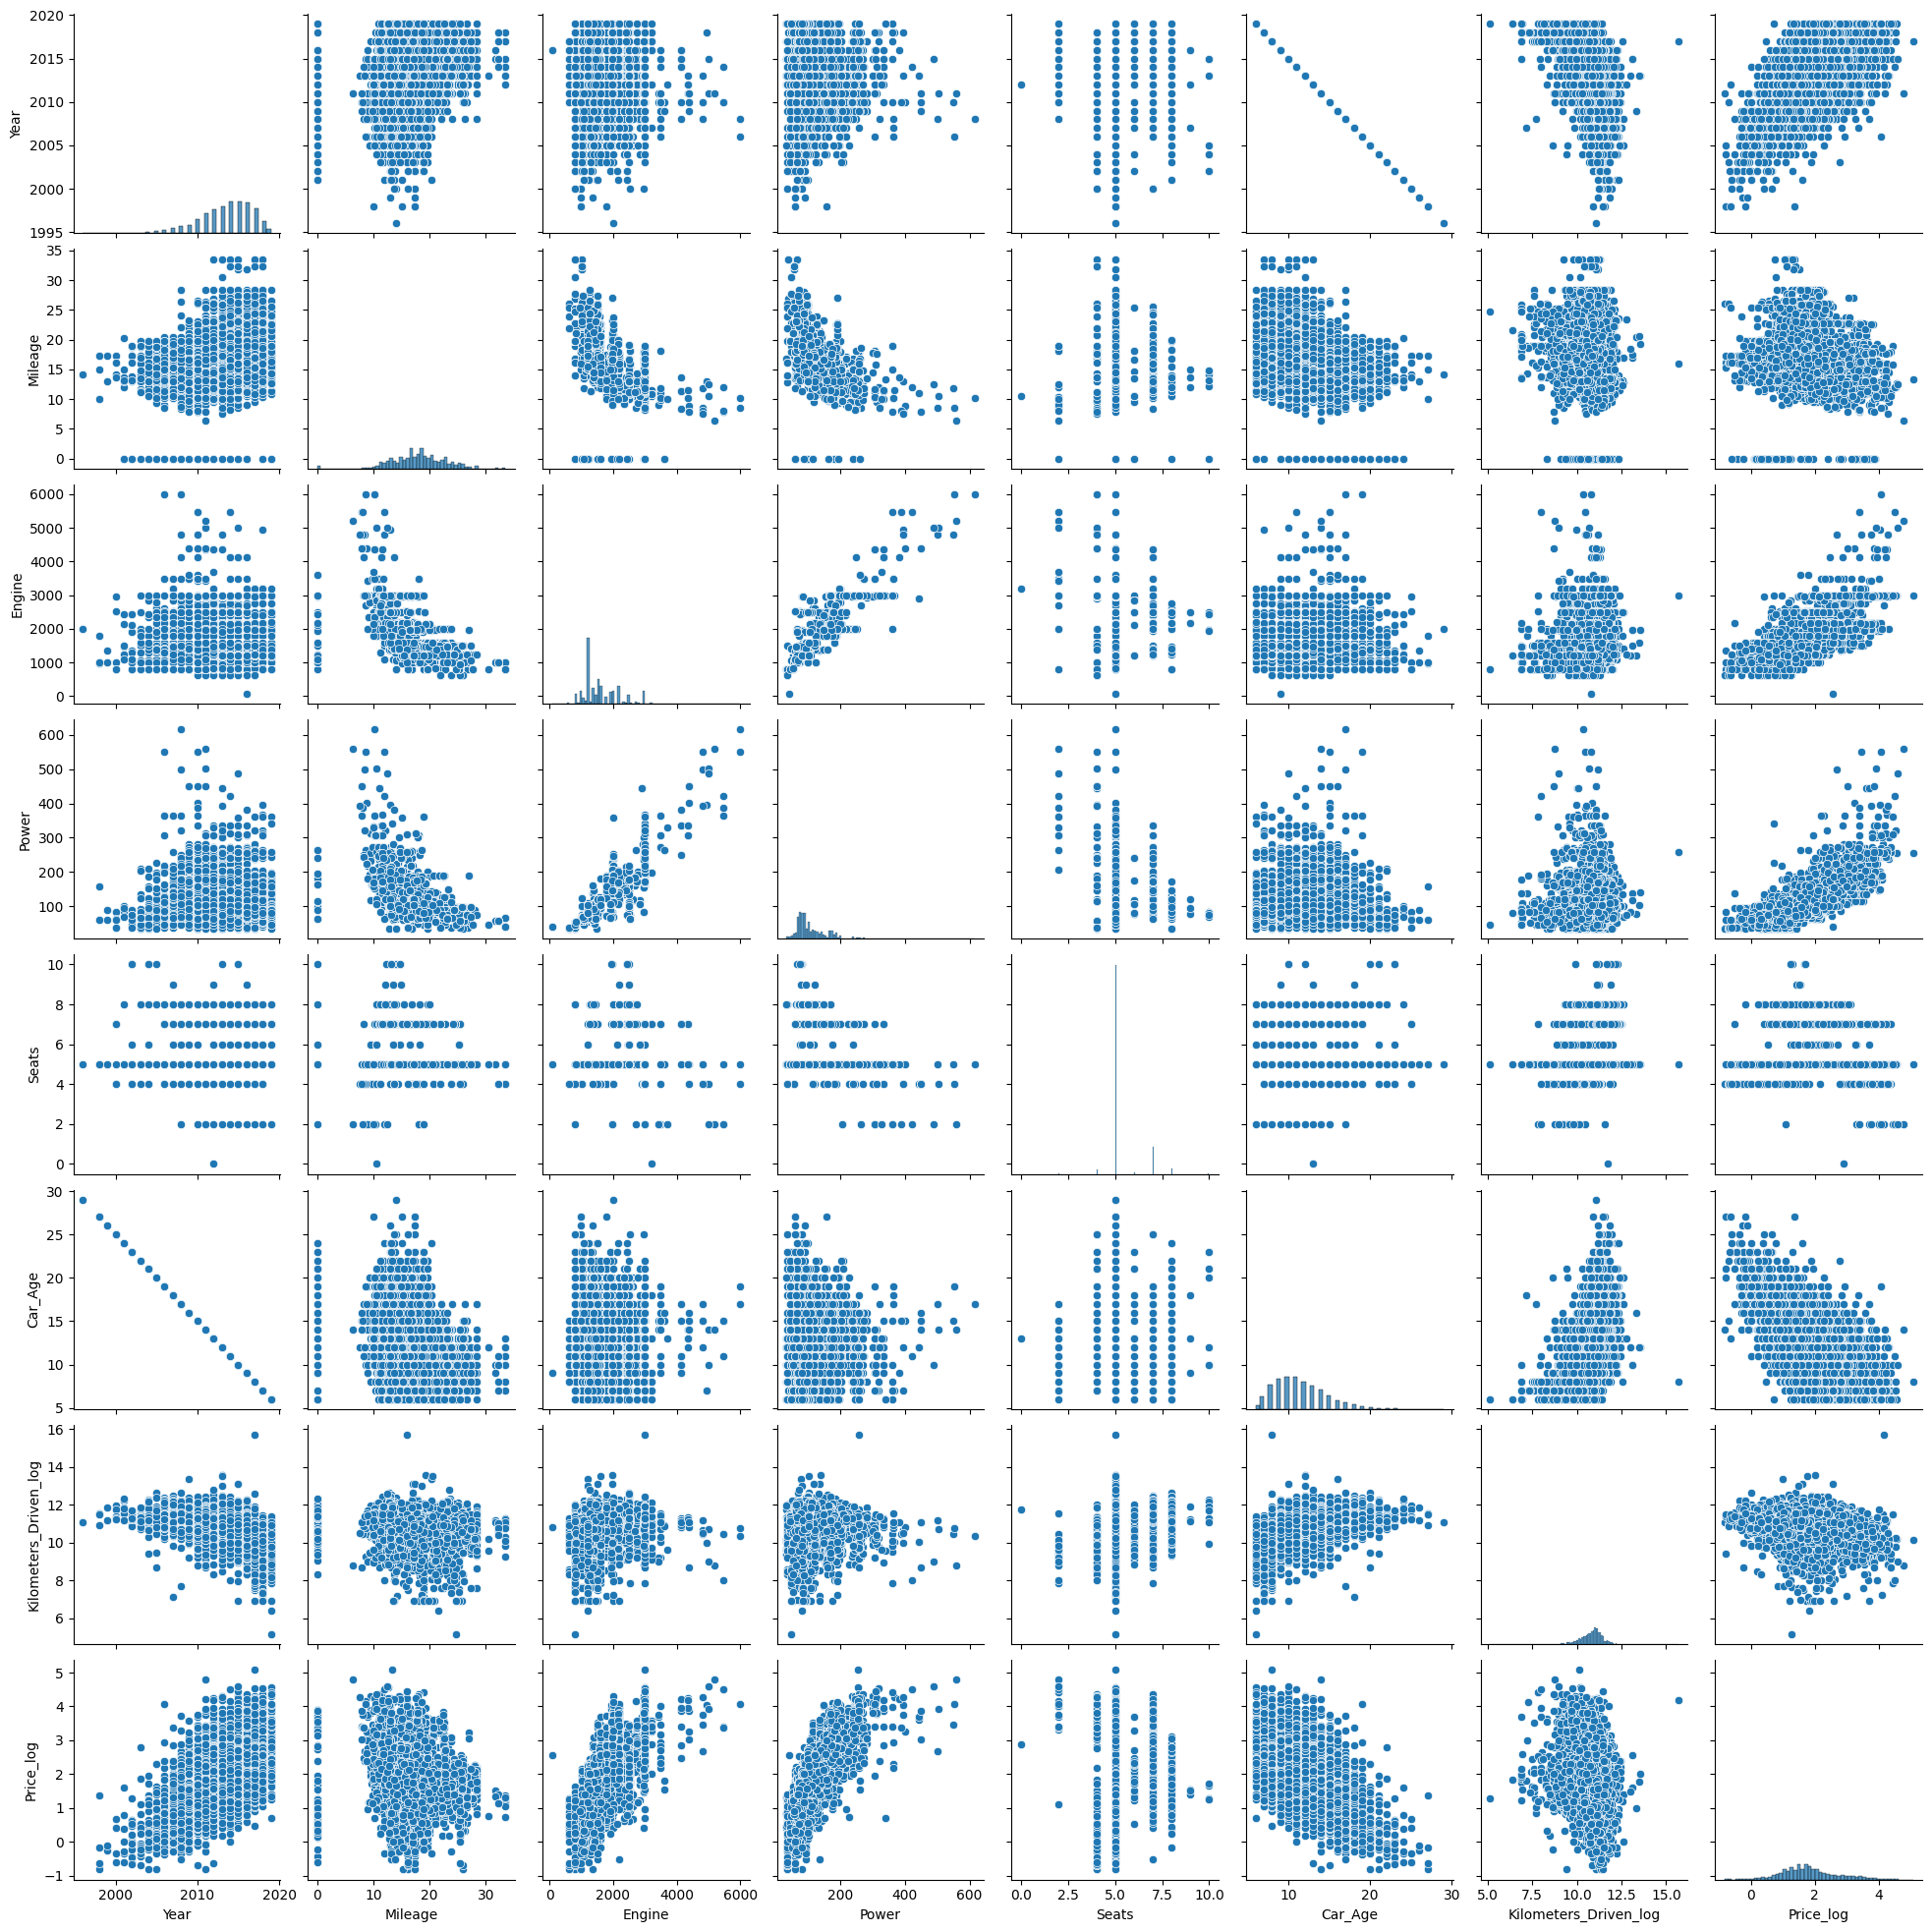

In [23]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

In [24]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Kilometers_Driven_log,Price_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,15,Maruti,WagonR,11.184421,0.559616
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10,Hyundai,Creta1.6,10.621327,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,14,Honda,JazzV,10.736397,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,13,Maruti,ErtigaVDI,11.373663,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,12,Audi,A4New,10.613246,2.875822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,14,Volkswagen,VentoDiesel,11.400999,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,10,Volkswagen,PoloGT,10.985293,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,13,Nissan,MicraDiesel,10.239960,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,12,Volkswagen,PoloGT,10.864025,NaN


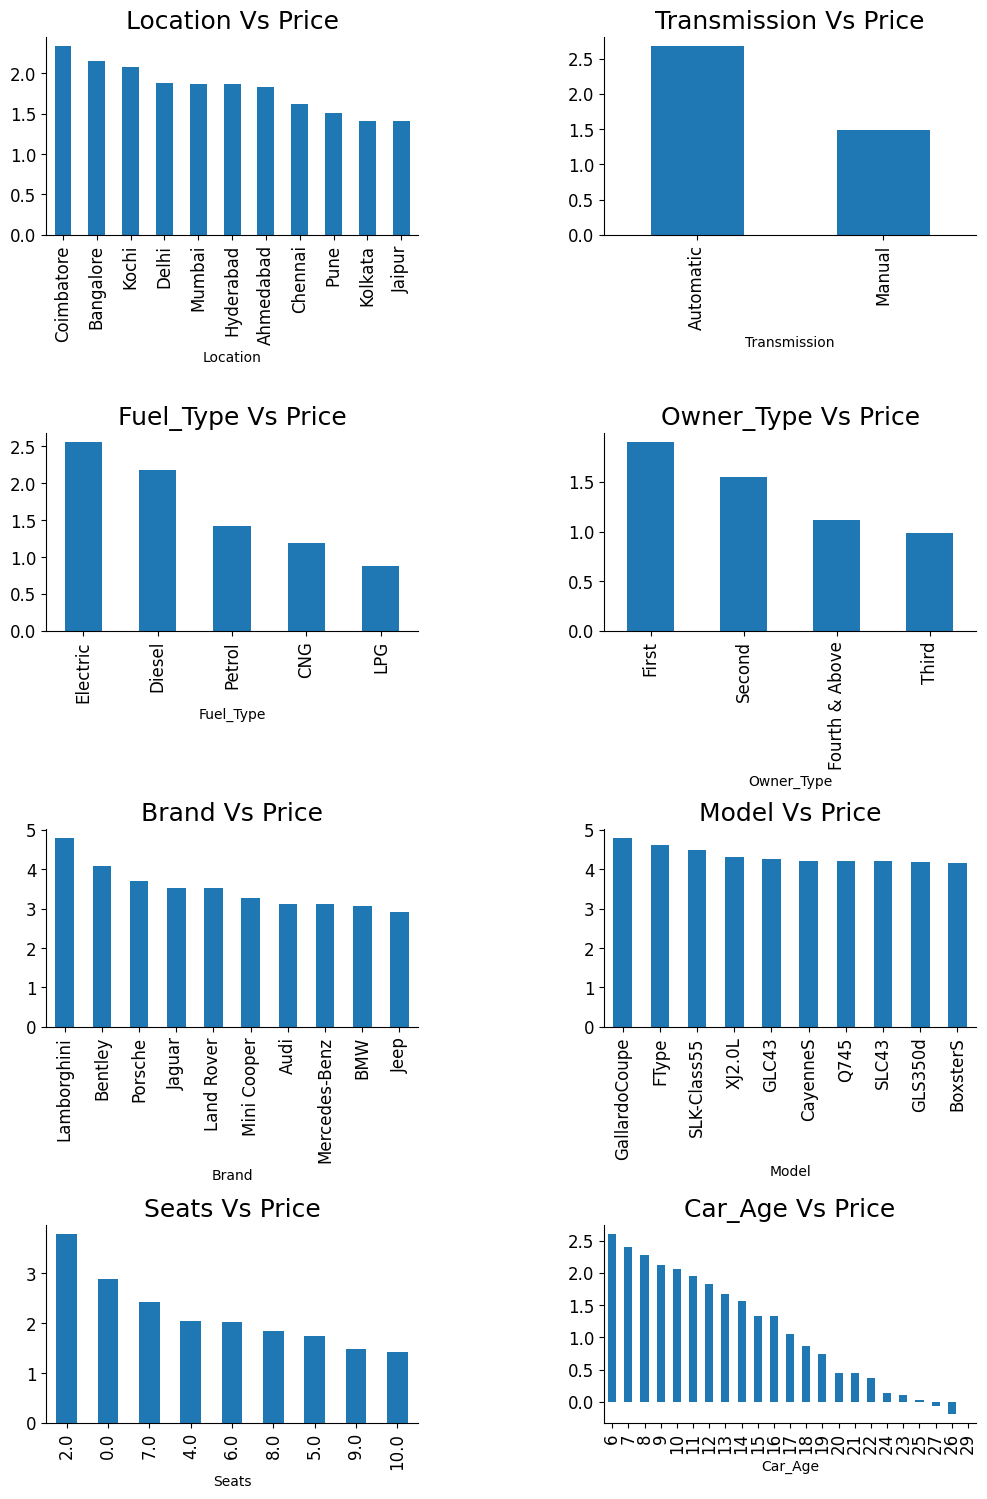

In [25]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))

# Evaluamos cada par de variables de interés
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)

data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)

data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)

data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)

data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)

data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)

data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)

data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

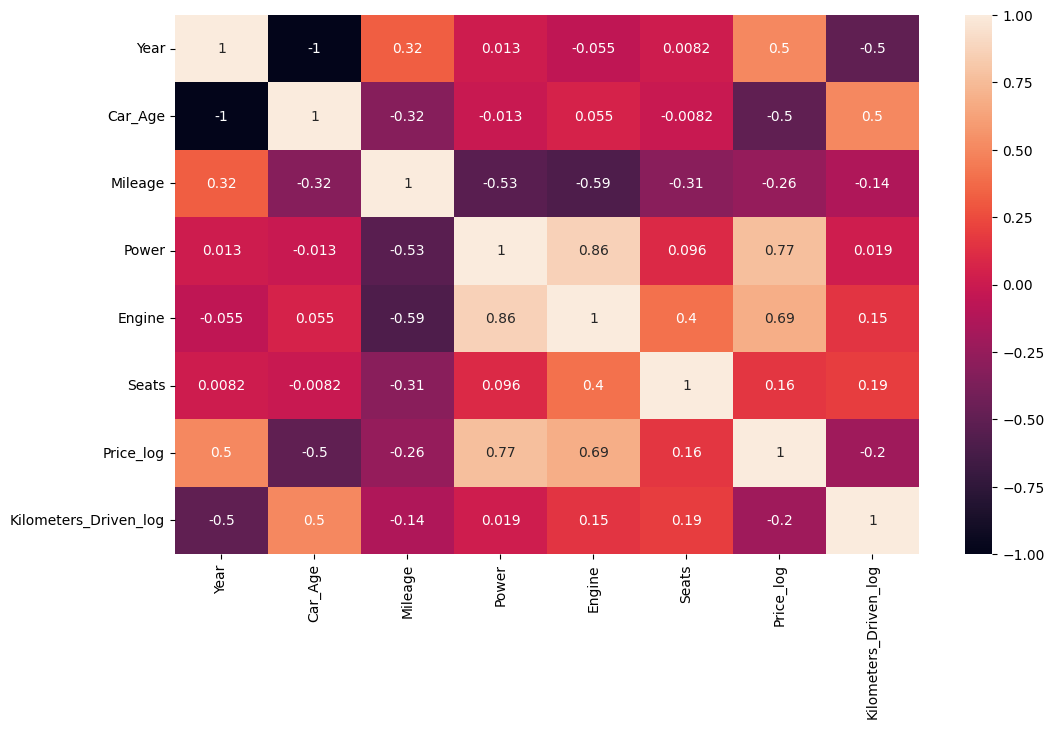

In [26]:
plt.figure(figsize=(12, 7))

sns.heatmap(data[["Year","Car_Age","Mileage","Power","Engine","Seats","Price_log","Kilometers_Driven_log"]].corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

## Valores faltantes

Unicamente nos quedaría evaluar qué hacer con los valores faltantes. Podemos, de conocer la distribución asignar el valor más frecuente o usual en cada caso.

In [27]:
data.loc[data["Mileage"]==0.0,'Mileage']=np.nan
data.Mileage.isnull().sum()

np.int64(83)

In [29]:
media = np.mean(data['Mileage'])

In [30]:
data['Mileage_No_missing'] = data['Mileage'].fillna(media)

Esta operación puede hacerse por grupos si creemos que la asignación así es más precisa pero requiere estudio detallado en cada caso.

In [35]:
data.Engine.isnull().sum()

np.int64(46)

In [34]:
data.groupby(['Brand','Model'])['Engine'].median()

Brand       Model        
Ambassador  ClassicNova      1489.0
Audi        A335             1968.0
            A41.8            1781.0
            A42.0            1968.0
            A43.0            2967.0
                              ...  
Volvo       V40Cross         1984.0
            V40D3            1976.5
            XC60D4           1984.0
            XC60D5           2400.0
            XC902007-2015    2400.0
Name: Engine, Length: 726, dtype: float64

In [38]:
# Supongamos que queremos rellenar los valores faltantes de 'Engine' agrupando por 'Brand'
data['Engine_filled'] = data['Engine']  # Creamos una copia para no sobrescribir

data['Engine_filled'] = data.groupby('Brand')['Engine_filled'].transform(
    lambda x: x.fillna(x.mean())
)

# Mostramos cuántos valores faltantes quedan
print("Valores faltantes en Engine_filled:", data['Engine_filled'].isnull().sum())

Valores faltantes en Engine_filled: 0


Podemos generar distintas agrupaciones y hacer una asignación más precisa.

In [39]:
data['Engine_filled'] = data['Engine']  # Creamos una copia para no sobrescribir

data['Engine_filled'] = data.groupby(['Brand','Model'])['Engine_filled'].transform(
    lambda x: x.fillna(x.mean())
)

# Mostramos cuántos valores faltantes quedan
print("Valores faltantes en Engine_filled:", data['Engine_filled'].isnull().sum())

Valores faltantes en Engine_filled: 19


Parece que tenemos alguna marca y modelo donde no tenemos dato alguno a rellenar.

In [42]:
data[data['Engine_filled'].isnull()][['Brand','Model','Engine_filled']]

,Brand,Model,Engine_filled
208,Maruti,Swift1.3,NaN
733,Maruti,Swift1.3,NaN
1327,Maruti,Swift1.3,NaN
2074,Maruti,Swift1.3,NaN
2325,Maruti,Swift1.3,NaN
2335,Maruti,Swift1.3,NaN
2668,Maruti,Swift1.3,NaN
3404,Maruti,Swift1.3,NaN
3810,Honda,CR-VAT,NaN
4011,Fiat,Punto1.3,NaN


Todos estos pasos de cara a componer nuestro tablón final deberán ser registrados ya que cualquier proceso posterior deberá replicar estas mismas operaciones, mismo orden, mismos procesos.